In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [14]:
data = pd.read_csv('panic_disorder_dataset_testing.csv')

In [15]:
data

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Exercise,Moderate,Sleep quality,0
19996,19997,27,Male,No,Yes,High,Panic attacks,Mild,Moderate,Rural,Asthma,Bipolar disorder,Alcohol,Exercise,High,Diet,0
19997,19998,21,Female,No,No,Low,Dizziness,Moderate,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Socializing,Moderate,Diet,0
19998,19999,28,Male,No,Yes,Moderate,Dizziness,Mild,Significant,Rural,Heart disease,Anxiety disorder,NaN,Meditation,Moderate,Sleep quality,0


In [16]:
new_data = data.drop(columns=['Participant ID','Family History','Psychiatric History','Substance Use','Demographics','Coping Mechanisms','Social Support','Impact on Life','Personal History','Current Stressors'])

In [17]:
new_data

,Age,Gender,Symptoms,Severity,Medical History,Lifestyle Factors,Panic Disorder Diagnosis
0,41,Male,Shortness of breath,Mild,Diabetes,Exercise,0
1,20,Female,Shortness of breath,Mild,Asthma,Diet,0
2,32,Male,Panic attacks,Severe,Heart disease,Exercise,0
3,41,Female,Shortness of breath,Moderate,Heart disease,Sleep quality,0
4,36,Female,Chest pain,Severe,Asthma,Exercise,0
...,...,...,...,...,...,...,...
19995,31,Female,Chest pain,Moderate,Heart disease,Sleep quality,0
19996,27,Male,Panic attacks,Mild,Asthma,Diet,0
19997,21,Female,Dizziness,Moderate,Asthma,Diet,0
19998,28,Male,Dizziness,Mild,Heart disease,Sleep quality,0


In [6]:
#splitting values 

In [24]:
y = data['Panic Disorder Diagnosis']

In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: Panic Disorder Diagnosis, Length: 20000, dtype: int64

In [26]:
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in new_data.columns:
    # Encode only categorical columns
    if new_data[col].dtype == 'object':
        new_data[col] = label_encoder.fit_transform(new_data[col])

In [27]:
new_data

,Age,Gender,Symptoms,Severity,Medical History,Lifestyle Factors,Panic Disorder Diagnosis
0,41,1,4,0,1,1,0
1,20,0,4,0,0,0,0
2,32,1,3,2,2,1,0
3,41,0,4,1,2,2,0
4,36,0,0,2,0,1,0
...,...,...,...,...,...,...,...
19995,31,0,0,1,2,2,0
19996,27,1,3,0,0,0,0
19997,21,0,1,1,0,0,0
19998,28,1,1,0,2,2,0


In [28]:
X = new_data.drop(columns=['Panic Disorder Diagnosis'],axis = 1)

In [29]:
X

,Age,Gender,Symptoms,Severity,Medical History,Lifestyle Factors
0,41,1,4,0,1,1
1,20,0,4,0,0,0
2,32,1,3,2,2,1
3,41,0,4,1,2,2
4,36,0,0,2,0,1
...,...,...,...,...,...,...
19995,31,0,0,1,2,2
19996,27,1,3,0,0,0
19997,21,0,1,1,0,0
19998,28,1,1,0,2,2


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
sc = StandardScaler()

In [37]:
xtrain_scaled= sc.fit_transform(x_train)
xtest_scaled = sc.transform(x_test)

In [38]:
x_train.shape

(16000, 6)

In [40]:
x_train.head()

,Age,Gender,Symptoms,Severity,Medical History,Lifestyle Factors
5894,51,1,0,0,2,2
3728,58,0,3,2,3,2
8958,27,0,2,1,1,0
7671,63,0,2,1,1,1
5999,50,1,0,0,2,1


In [41]:
xtrain_scaled
xtest_scaled

array([[ 1.54775953, -0.98819468, -1.40205417,  0.00483239,  1.34871786,
        -1.23994133],
       [ 0.61151029,  1.01194635,  0.71925711, -1.22244143, -1.33463028,
         1.21159543],
       [-1.40502654,  1.01194635,  0.01215335,  1.23210621,  1.34871786,
         1.21159543],
       ...,
       [-1.47704571,  1.01194635,  1.42636087,  0.00483239, -0.4401809 ,
        -1.23994133],
       [-0.39675812, -0.98819468,  0.71925711,  1.23210621,  1.34871786,
         1.21159543],
       [ 1.40372119, -0.98819468,  1.42636087,  1.23210621, -1.33463028,
         1.21159543]])

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfm = RandomForestClassifier()

# Model Training

In [46]:
rfm.fit(xtrain_scaled,y_train)

RandomForestClassifier()

# Model Prediction

In [47]:
y_pred = rfm.predict(xtest_scaled)

In [48]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Confusion Matrix

In [49]:
cm = confusion_matrix(y_test,y_pred)

In [50]:
cm

array([[3744,   85],
       [ 135,   36]], dtype=int64)

<Axes: >

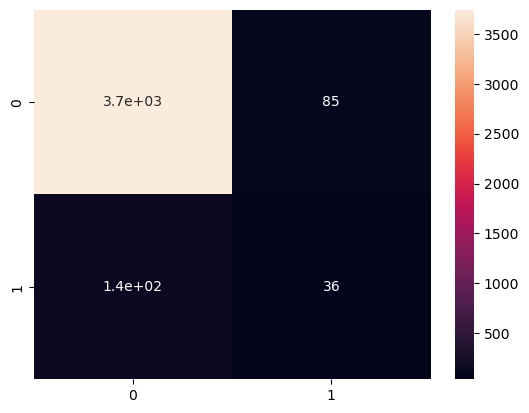

In [51]:
sns.heatmap(cm , annot = True)

In [52]:
accuracy = accuracy_score(y_test,y_pred)

In [53]:
accuracy

0.945

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3829
           1       0.30      0.21      0.25       171

    accuracy                           0.94      4000
   macro avg       0.63      0.59      0.61      4000
weighted avg       0.94      0.94      0.94      4000



# Hyper Parametre Tuning

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [60]:
parameters ={
    'n_estimators':[50,100],
    'max_features':['sqrt','log2',None]
}

In [61]:
gd = GridSearchCV(estimator=rfm,param_grid=parameters)

In [62]:
gd.fit(xtrain_scaled,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [63]:
gd.best_params_

{'max_features': None, 'n_estimators': 100}

# Building new Model with best parameters

In [66]:
new_rfm = RandomForestClassifier(max_features = None,n_estimators = 100)

In [67]:
new_rfm.fit(xtrain_scaled,y_train)

RandomForestClassifier(max_features=None)

In [68]:
#prediction

In [69]:
y_pred1 = new_rfm.predict(xtest_scaled)

In [70]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
accuracy = accuracy_score(y_test,y_pred1)

In [72]:
accuracy

0.943

In [74]:
 import pickle
pickle.dump(new_rfm , open( "model.pkl" , 'wb' ) )

In [75]:
#p = new_rfm.predict([[41,1,4,0,1,1]])

In [76]:
#p

array([0], dtype=int64)